In [1]:
from functions2 import *
import numpy as np

# Vasicek class: solve for model coeficients

Vasicek's model parameters can be solved by minimzing the loss function:

\begin{equation}
loss = \sum{\frac{1}{N}(P-P(0,T))^2} 
\end{equation}

The model for $P(0,T)$ is given by the following relations:

\begin{equation}
P(0,T) = A(T) exp^{-B(T)r_0}
\end{equation}
<br>
\begin{equation}
A(T) = exp{{\frac{(B(T)-T)(a^2b-\frac{\sigma^2}{2})}{a^2}}-\frac{\sigma^2B^2(T)}{4a}}
\end{equation}
<br>
\begin{equation}
B(T) = \frac{1-e^{-aT}}{a}
\end{equation}

The class Vasicek has this model implemented. It requires a time series with NelsonSiegel coeficients and the historical spot rates at a given set of maturities (ps). We use the method get_ps() on the previous cell to extract ps using NS.

In [2]:
class Vasicek():
    def __init__(self,NScoef,ps):
        self.t = np.array([1/12,0.25,0.5,1.0,2.0,3.0,5.0,7.0,10.0,20.0,30.0])
        self.NScoef = NScoef
        self.build_TS(NScoef)
        self.ps=ps
        self.sigma = np.std(ps)*np.sqrt(252)
        
    def build_TS(self,NScoef):
        t = self.t
        Nsiegel = NelsonSiegel(t)
        result = []
        for i in range(len(NScoef)):
            result.append(Nsiegel.NS(NScoef[i]))
        self.X = np.vstack(result)
        pass
    
    def Bt(self,t):
        a = self.a
        return 1-np.exp(-a*self.t)/a
    
    def get_AB(self):
        sigma = self.sigma
        x = self.t
        a = self.a
        b = self.b
        B = self.Bt(x)
        A = np.exp(((B-x)*(a**2*b-(sigma**2)/2))/a**2-(sigma**2*B**2)/(4*a))
        self.B=B
        self.A=A
        pass
    
    def get_P(self,r):
        A = self.A
        B = self.B
        b = np.exp(-np.multiply(B,r))
        return np.multiply(A,b)
    
    def loss(self,x):
        self.a = x[0]
        self.b = x[1]
        self.get_AB()
        sim_p = pd.DataFrame(self.X).apply(self.get_P,axis=1)
        p = 100/(self.ps+1)**self.t
        loss = np.array(p)-np.array(sim_p)
        size = loss.shape
        N = size[0]*size[1]
        loss = np.sum(loss**2)/N
        return loss
    
    def solve(self,x0=[1,1]):
        self.opt_results = optimize.minimize(self.loss,x0=x0,method='BFGS')
        self.a = self.opt_results.x[0]
        self.b = self.opt_results.x[1]
        print(self.opt_results)
    
    def price(self,T,r):
        dic = dict(zip(self.t,self.sigma))
        sigma = dic[T]
        a = self.a
        b = self.b
        B = 1-np.exp(-a*T)/a
        A = np.exp(((B-T)*(a**2*b-(sigma**2)/2))/a**2)-(sigma**2*B**2)/(4*a)
        return A*np.exp(-B*r)

    def rate(self,T,p):
        dic = dict(zip(self.t,self.sigma))
        sigma = dic[T]
        a = self.a
        b = self.b
        B = 1-np.exp(-a*T)/a
        A = np.exp(((B-T)*(a**2*b-(sigma**2)/2))/a**2)-(sigma**2*B**2)/(4*a)
        return -1*np.log(p/A)/B


Total of nulls RIFLGFCM01_N.B      0
RIFLGFCM03_N.B      0
RIFLGFCM06_N.B      0
RIFLGFCY01_N.B      0
RIFLGFCY02_N.B      0
RIFLGFCY03_N.B      0
RIFLGFCY05_N.B      0
RIFLGFCY07_N.B      0
RIFLGFCY10_N.B      0
RIFLGFCY20_N.B      0
RIFLGFCY30_N.B    994
dtype: int64

 Total of nulls 0


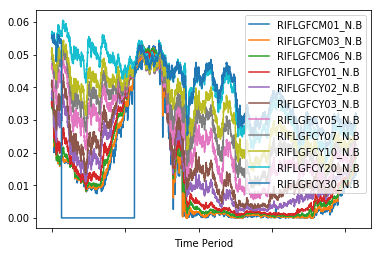

In [3]:
data,data_ = load_data()
data_.plot();

# Bootstrap

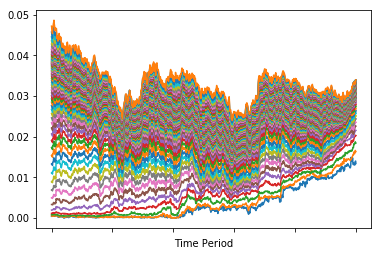

In [4]:
TS = BootStraper()
y = data_[-1000:]
x_=np.arange(1,30+1/2,1/2)
r = TS.BootStrap(x_,y[-1000:],method='spline')
r.plot(legend=False)

In [5]:
V = Vasicek(TS.NScoef,TS.ps)
V.solve()

AttributeError: 'BootStraper' object has no attribute 'NScoef'

In [ ]:
V.price(30,0.01)